# **Dependencies**

In [1]:
!pip install -q langchain langchain_community langchain_huggingface langgraph langchain-groq langgraph-checkpoint-sqlite
!pip install -q tavily-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.7 MB/s eta 0:00:00


In [2]:
import os
from google.colab import userdata

os.environ["GROQ_API_KEY"] = userdata.get("GROK_LLAMA3")
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")

# **Initializing LLM**

In [3]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name="Llama-3.1-8b-Instant")

In [4]:
import pprint

response = llm.invoke("Who is Imran Khan")

In [5]:
pprint.pprint(response.content)

('Imran Khan is a Pakistani politician, former cricketer, and philanthropist. '
 'He is the 22nd and current Prime Minister of Pakistan, serving from 2018 to '
 '2022. \n'
 '\n'
 'Born on October 5, 1952, in Lahore, Pakistan, Imran Khan studied at the '
 'Royal Grammar School in Guildford, England, and later attended the Keble '
 'College, Oxford, where he earned a degree in Philosophy, Politics, and '
 'Economics. He was an exceptional cricketer and captained the Pakistan '
 'national cricket team from 1982 to 1992.\n'
 '\n'
 'Imran Khan is the founder of the Pakistan Tehreek-e-Insaf (PTI), a '
 'center-right political party that focuses on social and economic reform. He '
 "was first elected to the National Assembly of Pakistan in 2013. Khan's rise "
 'to power was largely attributed to his successful campaign against '
 'corruption and his promise to bring change to Pakistan.\n'
 '\n'
 "As Prime Minister, Imran Khan's government focused on various initiatives, "
 'including:\n'
 '\n

# **Tavily**

In [6]:
from tavily import TavilyClient

client = TavilyClient(api_key=os.environ["TAVILY_API_KEY"])

response = client.search(query = "Election 2024 Pakistan")

pprint.pprint(response['results'][1]['content'])

('Here are the country’s major parties:\n'
 'Pakistan Muslim League-Nawaz (PMLN)\n'
 'Nawaz Sharif, a three-time prime minister, returned to Pakistan after four '
 'years – in late 2023 – to assume the role of the head of the party. By the '
 'numbers\n'
 'Pakistan election 2024: How the voting works\n'
 '‘Guerilla campaign’: How Imran Khan is fighting Pakistan election from jail\n'
 'Pakistan’s election: Can the next government bring economic stability?\n'
 ' The National Assembly comprises 336 seats – 266 to be decided through '
 'direct voting, while 60 seats are reserved for women and 10 for minorities '
 'which are allotted on the basis of 5 percent proportional representation in '
 'the federal parliament.\n'
 ' Skip links\n'
 'Live\n'
 'Navigation menu\n'
 'Live\n'
 'Pakistan election 2024: Live results\n'
 'About 128 million voters were registered to vote in national and state '
 'elections amid political and economic challenges.\n'
 ' How voting works in Pakistan\n'
 'Each vot

**Different Ways to look**

In [7]:
for result in response['results']:
  print(f"Title: {result['title']}, URL: {result['url']}")

Title: Pakistan election results 2024 updates: Counting on but no clear winner ..., URL: https://www.aljazeera.com/news/liveblog/2024/2/9/pakistan-election-results-2024-live-tight-race-as-vote-results-trickle-in
Title: Pakistan election 2024: Live results | Elections News - Al Jazeera, URL: https://www.aljazeera.com/news/2024/2/9/pakistan-election-2024-live-results
Title: Pakistan election results 2024: Pakistan's ex-Premier Sharif says he ..., URL: https://apnews.com/article/pakistan-election-results-sharif-khan-bfa8fa609e29aff4e656491340bba56e
Title: 2024 Pakistani general election - Wikipedia, URL: https://en.wikipedia.org/wiki/2024_Pakistani_general_election
Title: Election Commission of Pakistan, URL: https://ecp.gov.pk/general-elections-2024


Advance Look: Q & A Style

In [8]:
response = client.search(
    query = "Who is the director of Daredevil born again?",
    search_depth = 'advance',
    max_results = 7,
    include_images = True,
    include_answer = True,
    include_raw_content = False
)

print(response["answer"])

for result in response['results']:
  print(f"Title: {result['title']}, URL: {result['url']}")

Michael Cuesta is the director of "Daredevil: Born Again."
Title: 'Daredevil: Born Again' Lands Director Michael Cuesta, URL: https://www.hollywoodreporter.com/tv/tv-news/daredevil-born-again-lands-director-1235346034/
Title: 'Daredevil: Born Again' Releases Writers, Directors as Marvel ... - Variety, URL: https://variety.com/2023/tv/news/daredevil-born-again-writers-directors-marvel-overhaul-reshoots-1235751911/
Title: Daredevil Born Again: Release Info, Cast & Everything We Know So Far, URL: https://screenrant.com/daredevil-born-again-release-info-cast-updates/
Title: Daredevil: Born Again (TV Series 2025- ) - IMDb, URL: https://www.imdb.com/title/tt18923754/
Title: Benson & Moorhead Are the Perfect Directors for 'Daredevil: Born Again', URL: https://collider.com/daredevil-born-again-justin-benson-aaron-moorhead/
Title: 'Daredevil Born Again' — Everything We Know About the MCU Series, URL: https://collider.com/daredevil-born-again-charlie-cox-vincent-donofrio-mcu/
Title: 'Daredevil: 

Simplified Q & A

In [9]:
answer = client.qna_search(query = "Who is the director of Daredevil born again?")

print(answer)

The director of "Daredevil: Born Again" is Michael Cuesta.


**Prompt Template**

In [10]:
from langchain.prompts import ChatPromptTemplate

query = "Who will win US elections 2024?"

template = """
You are an AI critical thinker research assistant.
Your sole purpose is to write well written, objective and structured reports on given text.

Information: "{response}"
Using the above information, answer the following query: "{query} in a detailed report."
"""

prompt = ChatPromptTemplate.from_template(template)
formatted_prompt = prompt.format(response = response, query = query)

In [11]:
result = llm.invoke(formatted_prompt)
print(result.content)

**Report: Query Analysis and Response**

**Query:** "Who will win US elections 2024?"

**Analysis:** The provided information does not contain any relevant data or insights related to the 2024 US elections. The text is focused on the Marvel Studios series "Daredevil: Born Again," including its director, cast, and release information.

**Conclusion:** Based on the analysis, it is not possible to answer the query "Who will win US elections 2024?" as the relevant information is not available in the provided text.

**Recommendations:**

1. **External Research:** To answer the query, external research would be required, which includes accessing reputable sources of information on the 2024 US elections.
2. **Update Query:** If the query is modified to ask about the general information on the 2024 US elections, such as the candidates, issues, or campaigns, the AI can provide a more detailed report.

**Detailed Report (Alternative Query):**

**Query:** "What are the general information on the 

**The OpenAI Approach**

In [12]:
from langchain.adapters.openai import convert_openai_messages

prompt = [
    {
        'role':'system',
        'content': f"""You are an AI critical thinker research assistant.
        Your sole purpose is to write well written, objective and structured reports on given text.
        """
    },
    {
        'role': 'user',
        'content': f"""Information: {response}
        Using the above information, answer the following query: {query} in a detailed report."""
    }
]

lc_messages = convert_openai_messages(prompt)

In [13]:
lc_messages

[SystemMessage(content='You are an AI critical thinker research assistant. \n        Your sole purpose is to write well written, objective and structured reports on given text.\n        ', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Information: {\'query\': \'Who is the director of Daredevil born again?\', \'follow_up_questions\': None, \'answer\': \'Michael Cuesta is the director of "Daredevil: Born Again."\', \'images\': [\'https://www.looper.com/img/gallery/daredevil-born-again-what-we-know-so-far/l-intro-1686953507.jpg\', \'https://images.squarespace-cdn.com/content/v1/51b3dc8ee4b051b96ceb10de/b0620241-9a78-46eb-9625-cbc6df5b4453/marvels-daredevil-born-again-hires-dexter-director-michael-cuesta.jpg\', \'https://www.slashfilm.com/img/gallery/daredevil-born-again-returning-cast-release-window-and-more-info/who-are-the-directors-of-daredevil-born-again-1705194811.jpg\', \'https://9to5marvel.com/wp-content/uploads/2023/11/fjfjjfgjfgjf-copy.webp\', \'https://www.

**Creating a Tool**

In [14]:
!pip install -qU langchain-community
!pip install -q tavily-python

In [15]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results = 3)
tools = [tool]

In [16]:
response = tool.invoke("Who is Imran Khan")
response

[{'url': 'https://www.youtube.com/watch?v=vtdk3QzlLmo',
  'content': "Imran Khan is the cricket star, turned prime minister, turned ex-prime minister, who's at the centre of a political storm in Pakistan. #AJStartHere with Sand"},
 {'url': 'https://www.nytimes.com/article/imran-khan-pakistan.html',
  'content': 'By Christina Goldbaum and Matthew Mpoke Bigg\nImran Khan, who was arrested on corruption charges on Tuesday, was elected as Pakistan’s prime minister in 2018 when he ran as a nationalist promising to fight corruption, revive the country’s struggling economy and maintain an independent foreign policy that distanced Pakistan from the United States.\n Why was he arrested?\nMr. Khan’s relatively stable tenure began to unwind in 2021, as dissatisfaction with his handling of the economy came to a head and a dispute with the military over its leadership appeared to cost him its support. A year later, Mr. Khan tried to parlay his popularity from cricket — he had led Pakistan in 1992 to

# **Building AI agents graph**

In [17]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

In [18]:
class State(TypedDict):
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

# Telling the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)


tool_node = ToolNode(tools = tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)

graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
# We dont need to explicitly set a finish_point because our graph already has a way to finish
# graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

**Visualizing the Graph**

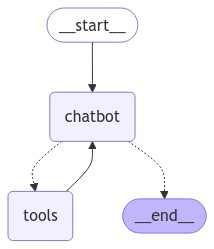

In [19]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quite", "exit", "bye", "q"]:
    print("Bot: Goodbye!")
    break

  for event in graph.stream({"messages": ("user",user_input)}):
    for value in event.values():
      print("Assistant: ", value["messages"][-1].content)
    print('-' * 50)

User: Who will win champions trophy 2025
Assistant:  
--------------------------------------------------
Assistant:  [{"url": "https://en.wikipedia.org/wiki/2025_ICC_Champions_Trophy", "content": "The 2025 ICC Champions Trophy is a cricket tournament for top eight ODI teams, hosted by Pakistan from 19 February to 9 March 2025. It will be the ninth edition of the tournament, after a six-year hiatus, and will feature venues in Karachi, Lahore and Rawalpindi."}, {"url": "https://www.sportingnews.com/in/cricket/news/icc-champions-trophy-2025-full-list-qualified-teams-hosts/9890bc69e82298421c5e5674", "content": "The 2025 ICC Champions Trophy will feature 8 teams, including Pakistan as hosts, and the top 7 teams from the 2023 ODI World Cup. Find out which teams have secured their spots and how the"}, {"url": "https://www.crictracker.com/icc-champions-trophy-winners-list/", "content": "Find out the winners and runners of the ICC Champions Trophy, a one-day international cricket tournament, fr

# **Adding a Memory**

In [23]:
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.checkpoint.memory import MemorySaver

memory = SqliteSaver.from_conn_string(':memory:')
graph = graph_builder.compile(checkpointer = MemorySaver()) # Adding Memory

In [26]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quite", "exit", "bye", "q"]:
    print("Bot: Goodbye!")
    break

  config = {'configurable':{'thread_id':'1'}}

  for event in graph.stream({'messages':('user', user_input)}, config = config):
    for value in event.values():
      print("Assistant: ", value["messages"][-1].content)

    print('-' * 500)

User: Who will win champions trophy 2025
Assistant:  
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Assistant:  [{"url": "https://fantasykhiladi.com/cricket/icc-champions-trophy-2025-format-teams-venue-schedule-points-table-and-final-date/", "content": "Champions Trophy Winners 2025. The current Champions Trophy winner is Pakistan who defeated India in the 2017 Champions Trophy Final at the Lords. India and Pakistan clashed together in the Final battle where Pak boasted with a big total of 338/4 in 50 overs. In response, Team India only ma